# DataFrames and Series

In [1]:
import pandas as pd
import numpy as np
nsfg= pd.read_hdf('nsfg.hdf5', 'nsfg')

In [2]:
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
nsfg.columns

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())
nsfg.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


# Clean and Validate

In [3]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [4]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


# Filter and visualize


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

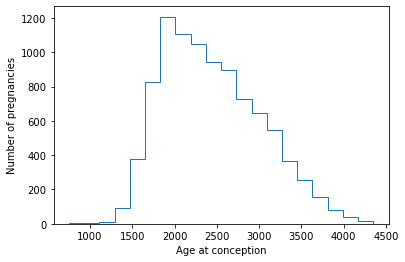

In [6]:
# Plot the histogram
plt.hist(nsfg.agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [7]:
# Create a Boolean Series for full-term babies
full_term = nsfg[nsfg.prglngth >= 37]

# Select the weights of full-term babies
full_term_weight = full_term.birthwgt_lb1

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

8.255738880918221


In [8]:
birth_weight= nsfg.birthwgt_lb1
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean in lbs:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean in lbs:', mult_full_term_weight.mean())

Single full-term mean in lbs: 8.24669922228251
Multiple full-term mean in lbs: 9.319148936170214


# Probability mass functions 

In [9]:
gss= pd.read_hdf('gss.hdf5', 'gss')
gss.head()


,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [10]:
from empiricaldist import Pmf

In [ ]:
# Compute the PMF for year
pmf_year = Pmf(gss.year, normalize=False)

# Print the result
print(pmf_year)

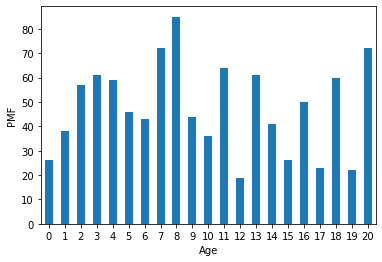

In [11]:
#Ploting the age of 1-20

# Select the age column
age = gss.age.loc[0:20]

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

# Cumulative distribution functions


In [12]:
from empiricaldist import Cdf

In [13]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

27.0


In [ ]:
cdf_income= gss.realinc
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

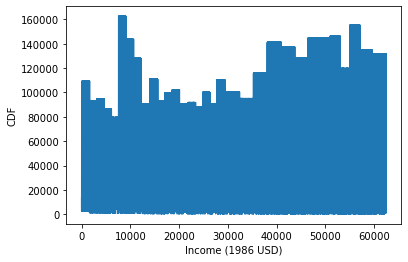

In [16]:
# Select realinc
income = gss.realinc

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

# Comparing Distrubitions 

In [17]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >=14) & (educ <16)

# High school (12 or fewer years of education)
high = (educ <=12)
print(high.mean())

0.5308807991547402


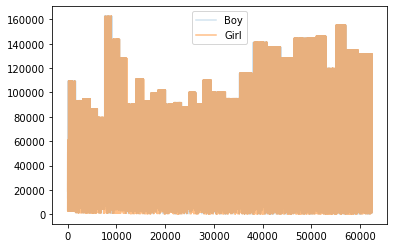

In [18]:
#set variable for income
income = gss.realinc
#set variable for gender
sex= gss.sex
#set for boy and girl
boy= gss.sex ==1
girl= gss.sex ==2
# plot
Pmf(income[boy]).plot(label='Boy', alpha=0.2)
Pmf(income[girl]).plot(label='Girl', alpha=0.5)
plt.legend()
plt.show()

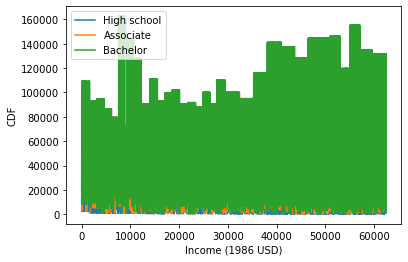

In [19]:
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

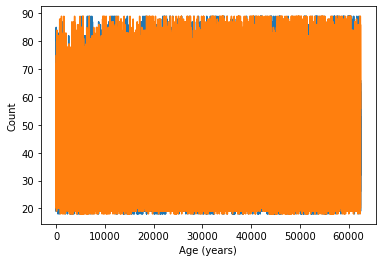

In [20]:
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]
Pmf(male_age).plot(label='Male')
Pmf(female_age).plot(label='Female')
plt.xlabel('Age (years)') 
plt.ylabel('Count')
plt.show()


# Modeling distributions


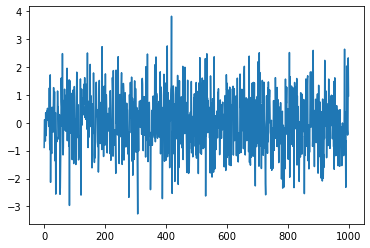

In [21]:
sample= np.random.normal(size=1000)
Cdf(sample).plot()

In [22]:
from scipy.stats import norm

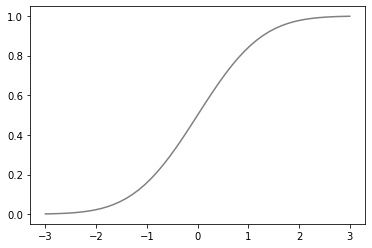

In [23]:
xs= np.linspace(-3,3)
ys= norm(0,1).cdf(xs)
plt.plot(xs, ys, color='gray')
plt.show()

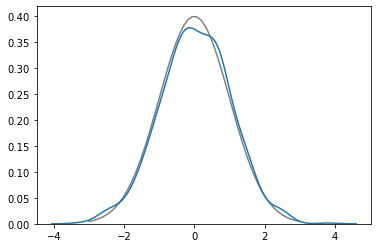

In [24]:
xs= np.linspace(-3,3)
ys= norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

In [25]:
# Extract realinc and compute its log
income= gss.realinc
log_income= np.log10(income)

## Compute mean and standard deviation
mean= log_income.mean()
std= log_income.std()
print(mean, std)

# Make a norm object
dist= norm()

4.371148677933652 0.4290082383271419


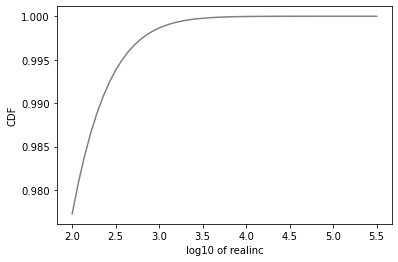

In [26]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
####Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

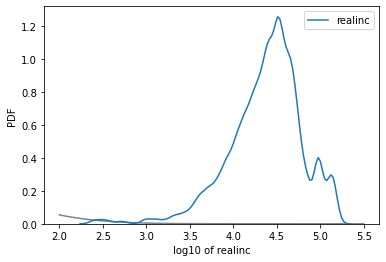

In [27]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

#Plot with kde
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

# Exploring relationship


In [87]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
print(brfss.head())
brfss.info()

        SEX   HTM4   WTKG3  INCOME2       _LLCPWT  _AGEG5YR  _VEGESU1  \
96230   2.0  160.0   60.33      8.0   1398.525290       6.0      2.14   
244920  2.0  163.0   58.97      5.0     84.057503      13.0      3.14   
57312   2.0  163.0   72.57      8.0    390.248599       5.0      2.64   
32573   2.0  165.0   74.84      1.0  11566.705300       3.0      1.46   
355929  2.0  170.0  108.86      3.0    844.485450       3.0      1.81   

        _HTMG10   AGE  
96230     150.0  47.0  
244920    160.0  89.5  
57312     160.0  42.0  
32573     160.0  32.0  
355929    160.0  32.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 96230 to 379327
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEX       99938 non-null   float64
 1   HTM4      95143 non-null   float64
 2   WTKG3     93404 non-null   float64
 3   INCOME2   83447 non-null   float64
 4   _LLCPWT   100000 non-null  float64
 5   _AGEG5YR  98794 no

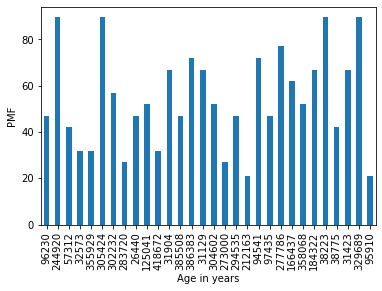

In [31]:
# Extract age
age = brfss.AGE[0:30]

# Plot the PMF
Pmf(age).bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.xticks(rotation=90)
plt.show()

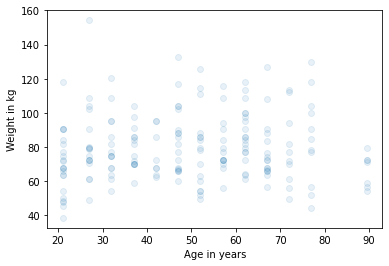

In [63]:
# Select the first 200 respondents
brfss= brfss[:1000]
#select age and weight
age= brfss.AGE
weight= brfss.WTKG3
#plot a scatter
plt.plot(age, weight, 'o', alpha=0.1)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()


Text(0, 0.5, 'Weight in KG')

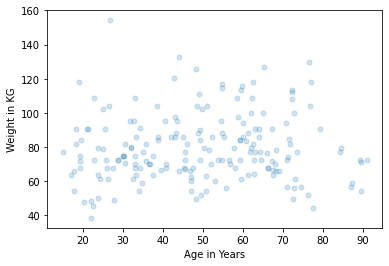

In [48]:
# Select the first 200
brfss= brfss[:200]

#age in jitter and weight
age= brfss.AGE + np.random.normal(0,2.5, len(brfss))
weight= brfss.WTKG3

#plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)
#label
plt.xlabel('Age in Years')
plt.ylabel('Weight in KG')

Text(0, 0.5, 'Weight')

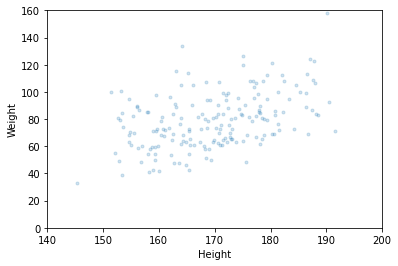

In [47]:
# height and weight
height= brfss.HTM4
weight
#jitter them
height= height + np.random.normal(0,2,len(brfss))
weight= weight + np.random.normal(0,2,len(brfss))
#plot
plt.plot(height, weight, 'o', markersize=3, alpha=0.2)
plt.axis([140,200, 0, 160])
plt.xlabel('Height')
plt.ylabel('Weight')

# Visualizing relationships


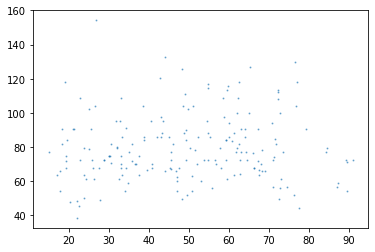

In [50]:
plt.plot(age, weight, 'o', markersize=1, alpha=0.50)

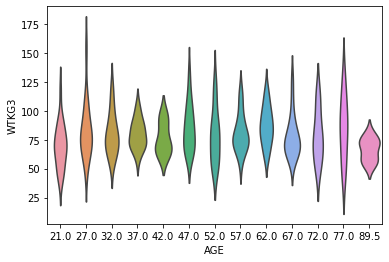

In [54]:
data= brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner= None )

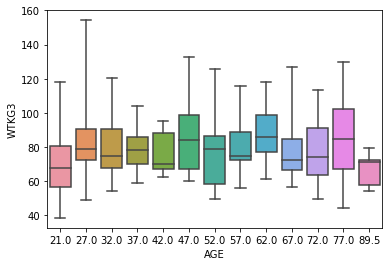

In [59]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

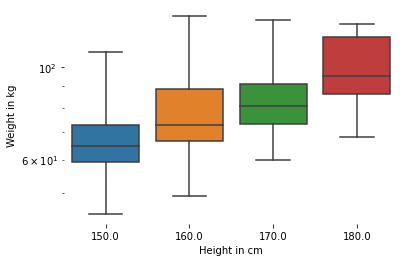

In [81]:

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

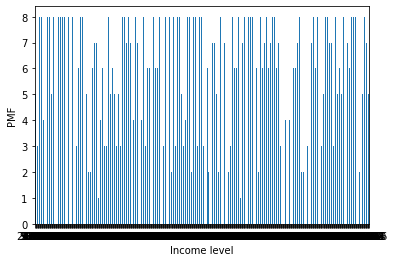

In [103]:
# Extract income
income = brfss.INCOME2

# Plot the PMF
Pmf(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

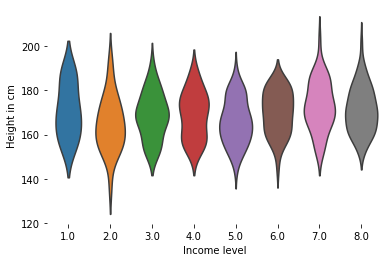

In [104]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', inner=None, data=data)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


# Correlation

In [108]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.036785 -0.059919
INCOME2  -0.036785  1.000000  0.104421
_VEGESU1 -0.059919  0.104421  1.000000


# Simple regression


In [112]:
from scipy.stats import linregress
linregress(xs, ys)

LinregressResult(slope=-2.560043680312126e-17, intercept=0.346938775510204, rvalue=-4.862244557122017e-17, pvalue=0.9999999999999998, stderr=0.07599586418377655)

In [113]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06529834846388904, intercept=1.6081564592868696, rvalue=0.10442069919234165, pvalue=0.040840808137170705, stderr=0.03182022244390305)


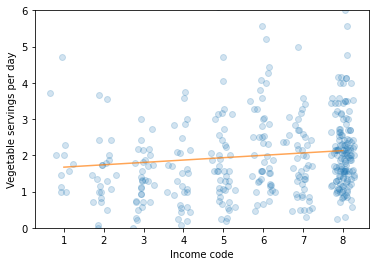

In [114]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

# Limits of simple regression


In [115]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.06529834846388904, intercept=1.6081564592868696, rvalue=0.10442069919234165, pvalue=0.040840808137170705, stderr=0.03182022244390305)
Intercept    1.608156
INCOME2      0.065298
dtype: float64


# Multiple regression


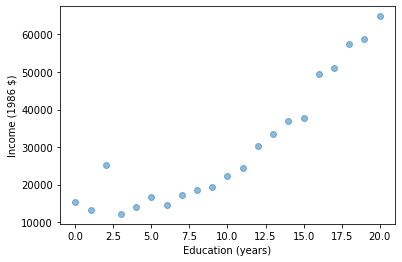

In [116]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [136]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss.educ **2
gss['age2']= gss.age **2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age +age2', data=gss).fit()

# Print the estimated parameters
print(results.params)


Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


# Visualizing regression results


In [137]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


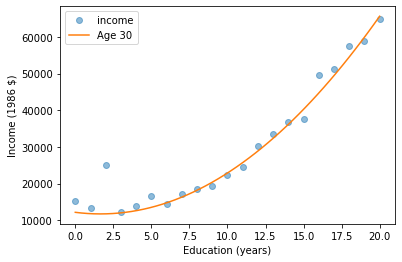

In [139]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5, label='income')

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

# Logistic regression
 

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


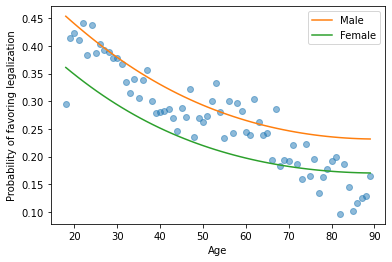

In [151]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()


In [152]:
# Set gunlaw to support at 1 and as 0
gss.gunlaw.replace(2,0, inplace=True)
gss.gunlaw.value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [155]:
# set the relationships between each variable
formula= 'gunlaw ~ age + age2+ educ + educ2 + C(sex)'
results= smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

In [ ]:
# results show gender plays a key role in supporting gun control laws

In [163]:
#create empty DF
df = pd.DataFrame()
# create age and education columns
df['age'] = np.linspace(18, 89)
df['educ'] = 12
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2
#To see the difference in sex
df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)


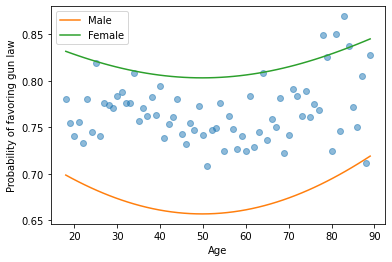

In [167]:
# Visulaize your results by plotting
#First groupby age
grouped= gss.groupby('age')
# Find the average mean of gun laws by agg
gun_law= grouped['gunlaw'].mean()
# plot the initial scatter plot
plt.plot(gun_law, 'o', alpha=0.5)
# Now plot with adding the pred1 and pred2
plt.plot(df.age, pred1, label='Male')
plt.plot(df.age, pred2, label='Female')
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()
plt.show()